# Cartopy and Gridding in python

This notebook contains an example code on how to make maps with cartopy and how to grid data, which is displayed on a map.

Notebook written by Maximilian Lowe (maxwe32@bas.ac.uk), last updated 10/06/2024

# Content
This jupyter notebook contains:

<ol>
  <li>Cartopy overview and simple global map</li>
  <li>Map featues</li>
  <li>Rotating global maps</li>
  <li>Map projection</li>
  <li>High resolution background topographic maps</li>
  <li>Data gridding</li>
  <li>Multiple figure axis</li>
</ol>



# Introduction
**Cartopy** is a python package, which is dedicated to draw maps and visualzing spatial data on maps. Drawing a basic map in cartopy is relative straight forwrad and doesnt require a lot of code. Advance maps might require more code. We will with simple maps and gradually increase our code with the aim of producing a nice overview map, which could be used in your published.

We start by importing the necessary libraries to create simple maps with **cartopy** and **matplotlib**:

In [1]:
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

## Simple global map

First, we need to create a new and empty matplotlib figure by using the command: `figure1 = plt.figure(figsize=(8, 8))`.

Next we draw a subplot, which allows of plotting mutlple panels in one figure with the subsequent command: `ax1 = plt.subplot(1, 1, 1, projection=ccrs.Robinson())`

Here we plot only one figure, therefore we only define one panel as `ax1`. The subfigure parameters are set to `1, 1, 1,`, which gives the position of the subfigure in a row and column system. The first number stands for the numbers of rows and the scond number stands for the number of columns, while the third number stands for the postions of the subfigure in row and colums, which is counted from left to right and up to down.

More important, perhaps, is the following projection statement `projection=ccrs.Robinson())` at the end of this command. The projection statement defines the subfigure axis in the a given projection. Here we use the Robinson projection. The most common map projections are supported by **cartopy** including **UTM zones, SouthPolarStereo** and, **cylindrical projections**. A list of projection can be found here: https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html.


Next use **cartopy** to draw costlines into our subfigure by using the command `ax1.coastlines()`.


Last, we draw gridlines of our map and give latitude and longitude lables by applying the following command `ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")`. `linewidth=0.5` defines the thickness of the displayed gridlines. `draw_labels=True` draws the the latitude and longitude labels. Setting the argument to `None` instead of `True` will supress the labels. `color="k"` is setting the color of the grid lines. Here we use "k" which draws the lines in blac**k**. The `alpha=0.5` command set the grid lines to a transprancy level of 50% and `linestyle="-"` draws the gridlines as a continous line. 

We have now create a simple global map with only four lines of python code

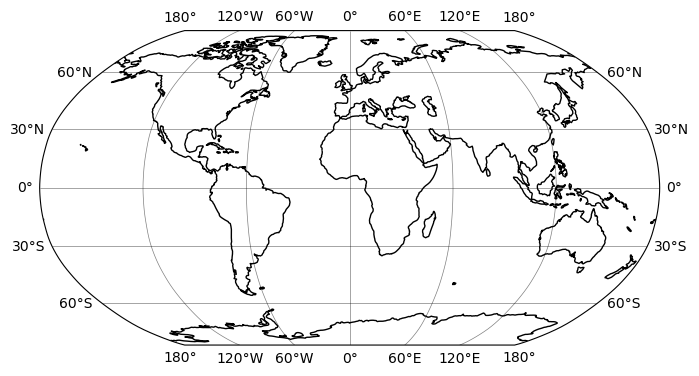

In [2]:
figure1 = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.Robinson())
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

Next we want to fill the contients and oceans with a color to create a more appealing map. To do so, **cartopy** provides feature catalogues containing datasets / features including landmass and oceanmass, political boundaries, river and lakes, as well as satellite imagery. 

First we need to load the cartopy features by running the following commandline.

In [3]:
from cartopy import feature as cfeature

To color-in land and ocean areas we simple use the `add_feature` command to our figure axis here `ax1`. 

Lastly we only need to pass two additional aruments to the command. In the first arument we chose the feature we wanting to plot. Here we want to plot land in a particular color. Therefore, we choose from the cartopy features the LAND category: `cfeature.LAND`. The second arument defines the color in which the land is displayed. Here we chose sandybrown for the landmass by `color="sandybrown"`. 

To color in the ocean we simple copy the perivous line of code and only change the chosen feature from `cfeature.LAND` too `cfeature.OCEAN` and to set the color to lightblue by chosing the followig argument `color="lightblue`.

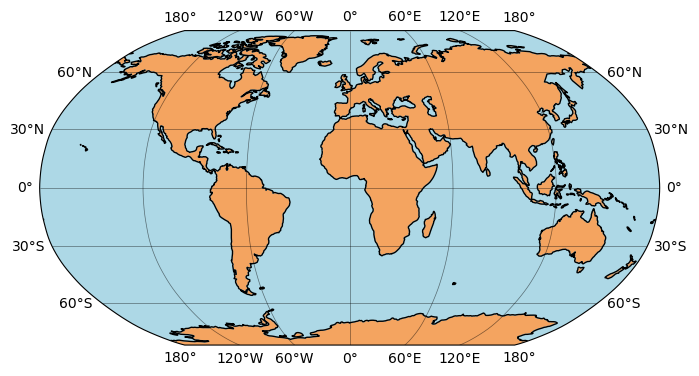

In [4]:
figure1 = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.Robinson())

ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax1.add_feature(cfeature.LAND, color="sandybrown")
ax1.add_feature(cfeature.OCEAN, color="lightblue")
ax1.coastlines()

An important feature built into cartopy for plotting appealing global maps are satellite images. Satellite images can be accessed by `stock_img()`. We simple substitute commend with the perivous `cfeature` commands.

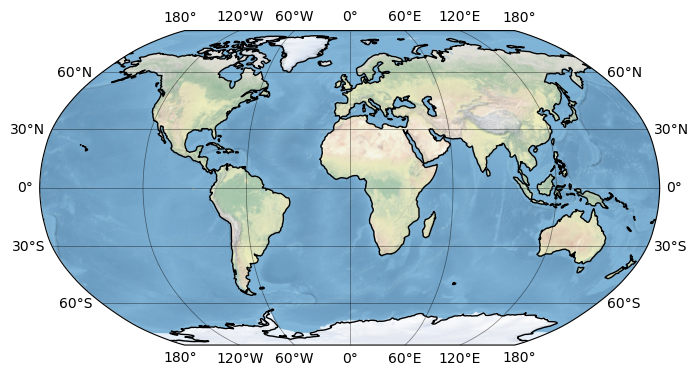

In [5]:
figure1 = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.Robinson())
ax1.stock_img()
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

## Map featues

So far we have only plotted contentend scale features. However, for different perposies it might be disarble to plot more detailed map features like rivers, lakes or potical boundaries. The requiered commands to plot those featues are: `cfeature.RIVERS` for rivers, `cfeature.LAKES` for lakes and `cfeature.BORDERS` for country boundaries.

Those features come with different resolutions. You can choose between `110m`, `50m` and `10m` resolution. The resolution statment is added after the choosen features by typing `.with_scale("110m")`. The full command would be: `ax1.add_feature(cfeature.LAKES.with_scale("110m"), color="darkblue")`

A lower resolution for lakes and rivers effectivly plots only large water bodies, while a higher resolution plots more detailed water bodies (See plot below). Generally it is worth while to plot only the most prominent water bodies for a overview map if any at all. High resolution option should only be choosen if those features are relevant to the figure.

In the following subplot we are ploting for the first time multiple subfigures. The subplot command `subplot(1, 3, 1, projection=ccrs.Robinson())` discribes now that we plot 1 row of figues (first given number) with 3 colums (second giving number). The last number (here 1) describes that this subfigure is the first Figure in the row. The Figure numbering reads from left to right and up to down. Since we state it is the first figure we asing this figures the frist frame axis. Here, `ax1`



C:\Users\maxim\.conda\envs\demo_cartopy\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
C:\Users\maxim\.conda\envs\demo_cartopy\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
C:\Users\maxim\.conda\envs\demo_cartopy\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


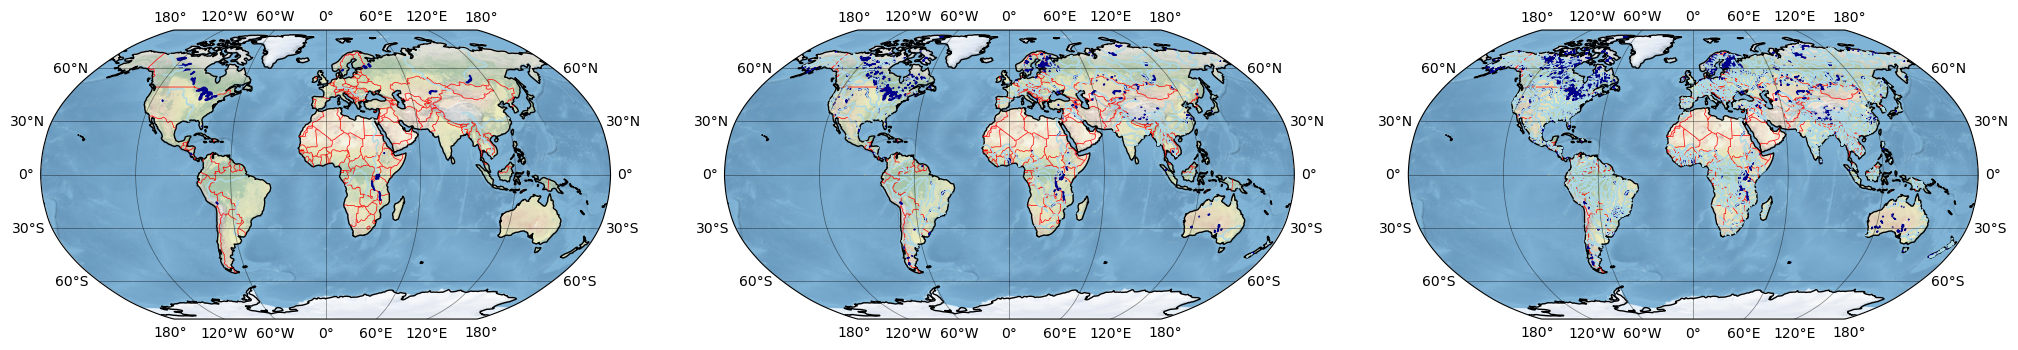

In [6]:
figure1 = plt.figure(figsize=(25, 25))

ax1 = plt.subplot(1, 3, 1, projection=ccrs.Robinson())

ax1.stock_img()
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor="red")
ax1.add_feature(cfeature.LAKES.with_scale("110m"), color="darkblue")
ax1.add_feature(cfeature.RIVERS.with_scale("110m"), color="lightblue")
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")


ax2 = plt.subplot(1, 3, 2, projection=ccrs.Robinson())
ax2.stock_img()
ax2.coastlines()
ax2.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor="red")
ax2.add_feature(cfeature.LAKES.with_scale("50m"), color="darkblue")
ax2.add_feature(cfeature.RIVERS.with_scale("50m"), color="lightblue")
ax2.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

ax3 = plt.subplot(1, 3, 3, projection=ccrs.Robinson())
ax3.stock_img()
ax3.coastlines()
ax3.add_feature(cfeature.BORDERS, linewidth=0.5, edgecolor="red")
ax3.add_feature(cfeature.LAKES.with_scale("10m"), color="darkblue")
ax3.add_feature(cfeature.RIVERS.with_scale("10m"), color="lightblue")
ax3.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

To further demonstate the influence of the `scale` statment we now look at the land mass of the United Kingdom and plot the Islands with the three different resolutions. We also make a amendment to the color statement. Here we use two statment to plot the land mass in sandybrown by the command `facecolor` and plot the outline of the land mass in black by using the command `edgecolor`. To zoom in to the United Kingdom we simple use the `set_extent` command followed by the longitue and latitude extend of our map: `ax1.set_extent([-11, 2, 49, 60], crs=ccrs.PlateCarree())`. Additioanlly we use here the `PlateCarree` projection, which is a equidistant cylindrical projection.


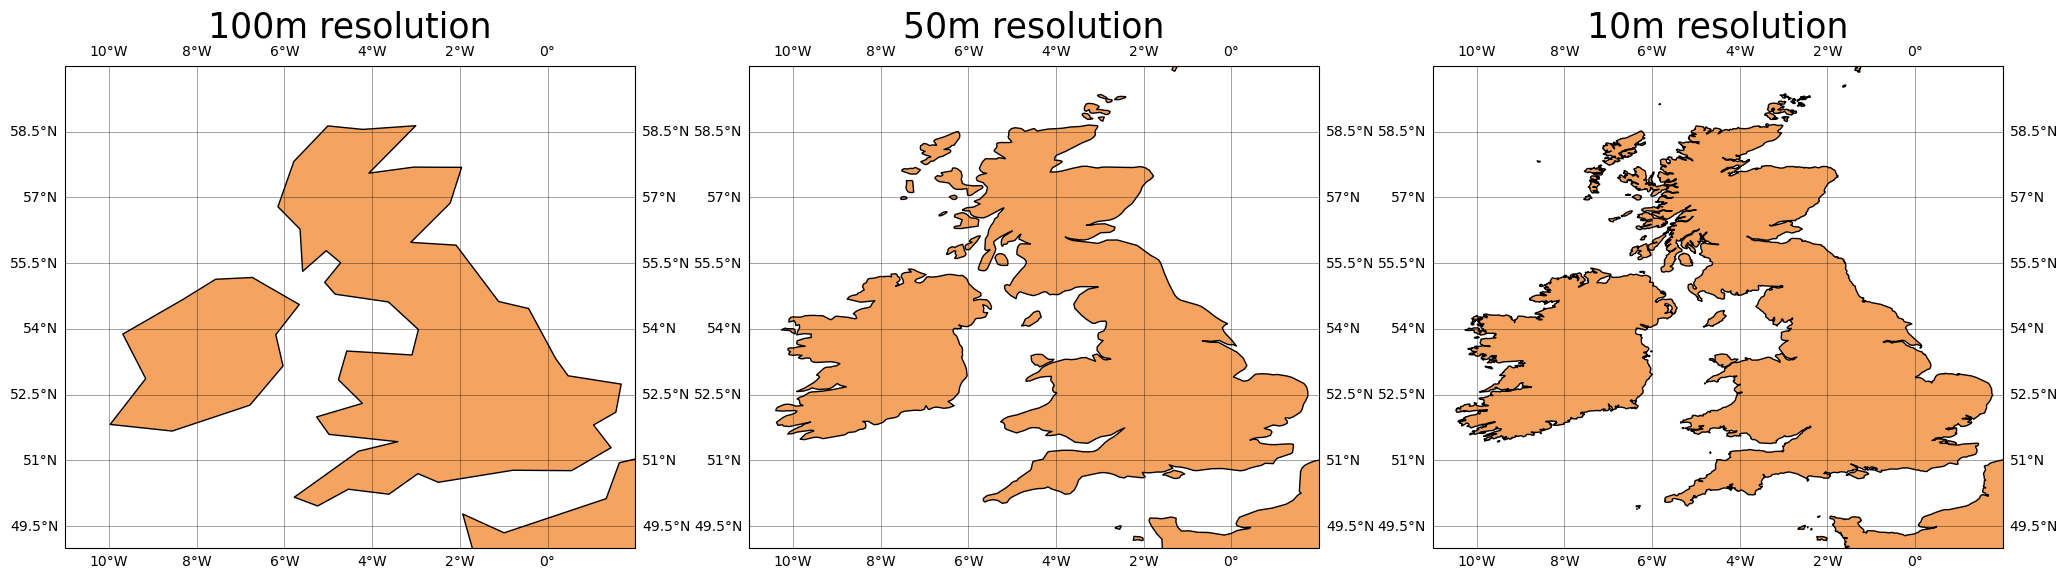

In [7]:
figure1 = plt.figure(figsize=(25, 25))

ax1 = plt.subplot(1, 3, 1, projection=ccrs.PlateCarree())
ax1.add_feature(cfeature.LAND.with_scale("110m"), edgecolor="k", facecolor="sandybrown")
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax1.set_extent([-11, 2, 49, 60], crs=ccrs.PlateCarree())
ax1.title.set_text("100m resolution")
ax1.title.set_size(25)

ax2 = plt.subplot(1, 3, 2, sharex=ax1, sharey=ax1, projection=ccrs.PlateCarree())
ax2.add_feature(cfeature.LAND.with_scale("50m"), edgecolor="k", facecolor="sandybrown")
ax2.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax2.title.set_text("50m resolution")
ax2.title.set_size(25)

ax3 = plt.subplot(1, 3, 3, sharex=ax1, sharey=ax1, projection=ccrs.PlateCarree())
ax3.add_feature(cfeature.LAND.with_scale("10m"), edgecolor="k", facecolor="sandybrown")
ax3.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax3.title.set_text("10m resolution")
ax3.title.set_size(25)

## Rotating global maps

So far we have plotted the standard map view by using a particular projection by leaving the brackets of the projection command `ccr` empty. It is to those brackets we turn our attention next because this brackets is a strong toolbox to manipulate the ploted map. For now we will use the `ccrs.Orthographic()` projection. However, we dont leave the brackets empty but rather give the `central_latitude` and `central_longitude` statments. Those statements allow to "rotate" the map my setting the centre of the map to different geographic locations. Setting those parameters to 0 gives the default map view wile setting the `central_longitude` to 290 will plot a global map with South America in the centre of the map.

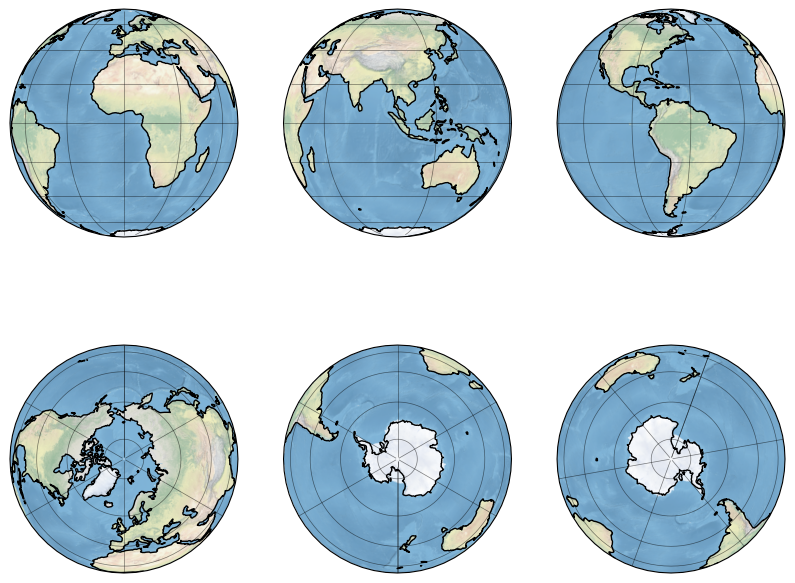

In [8]:
figure1 = plt.figure(figsize=(10, 8))

ax1 = plt.subplot(
    2, 3, 1, projection=ccrs.Orthographic(central_latitude=0, central_longitude=0)
)
ax1.stock_img()
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

ax2 = plt.subplot(
    2, 3, 2, projection=ccrs.Orthographic(central_latitude=0, central_longitude=100)
)
ax2.stock_img()
ax2.coastlines()
ax2.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

ax3 = plt.subplot(
    2, 3, 3, projection=ccrs.Orthographic(central_latitude=0, central_longitude=290)
)
ax3.stock_img()
ax3.coastlines()
ax3.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

ax4 = plt.subplot(
    2, 3, 4, projection=ccrs.Orthographic(central_latitude=90, central_longitude=0)
)
ax4.stock_img()
ax4.coastlines()
ax4.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

ax5 = plt.subplot(
    2, 3, 5, projection=ccrs.Orthographic(central_latitude=-90, central_longitude=0)
)
ax5.stock_img()
ax5.coastlines()
ax5.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

ax6 = plt.subplot(
    2, 3, 6, projection=ccrs.Orthographic(central_latitude=-90, central_longitude=160)
)
ax6.stock_img()
ax6.coastlines()
ax6.gridlines(linewidth=0.5, draw_labels=False, color="k", alpha=0.5, linestyle="-")

## Projection and Transform arguments

So far we have established the basemap / background map. However, most of the time when we create figues we want to plot additional data ontop of it. On of the bigest obstacles for creating figures is that often the data you want to plot on a map are provided in different coordinates systems . Therefore, usally datasets need to be reprojected into the a uniform coordinates systems, which is a source of potential error and frustation. Cartopy solves this problem quite elgantly by allowing you to plot different data with different coordinates systems as long as you know in which coordinates systems each dataset is. Cartopy does the reprojecting in the background for you. 

The projected axes of cartopy maps are independent from the coordinate system of the used dataset. The `projection` arguments defines the map outlay. Everything is displayed within that map in the defined projection. The `transform` argument tells Cartopy in which coordinate system the data is presented. Cartopy takes the datasets and the defined coordinate system and reprojects the data in the coordinate system defined for the plotted map.

Lets have a look at an example using data in Latitude Longitude (PlateCarree projection) and in a Stereographic projection in the same figure. For this example we plot the Antarctica research stations operated by the British Antarctic Survey in Antarctica. The figure is plotted in aStereographic projection. The coordinates for the Rothera and Halley station are provided in latitdue and longitude (), while the signey station is provided in steographic coordinates. We plot all the station in the sterographic map without applying any reporjection ourself. 

Amendments to our plotting approach is to add a `label` statement (for example `label="Rothera station"`) to each plotting command and plotting a legend based on those lables on the upper right side of the map by applying: `ax1.legend(loc="upper right")`

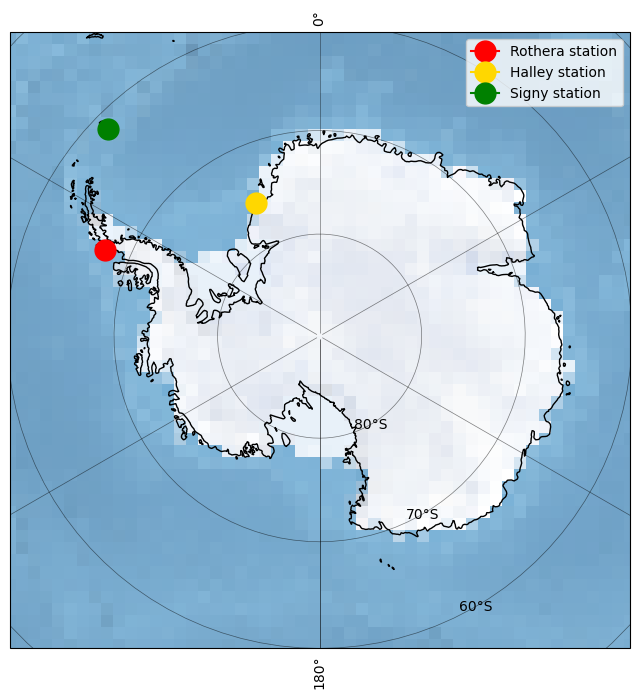

In [9]:
Rothera_lat = -67.56778
Rothera_lon = -68.12778
Halley_lat = -75.56805
Halley_lon = -25.50833
Signy_x_ps = -2322053.890662
Signy_y_ps = 2273923.172021

figure1 = plt.figure(figsize=(8, 8))
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
ax1.stock_img()
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
ax1.plot(
    Rothera_lon,
    Rothera_lat,
    color="red",
    marker="o",
    markersize=15,
    transform=ccrs.PlateCarree(),
    label="Rothera station",
)

ax1.plot(
    Halley_lon,
    Halley_lat,
    color="gold",
    marker="o",
    markersize=15,
    transform=ccrs.PlateCarree(),
    label="Halley station",
)

ax1.plot(
    Signy_x_ps,
    Signy_y_ps,
    color="green",
    marker="o",
    markersize=15,
    transform=ccrs.SouthPolarStereo(),
    label="Signy station",
)

ax1.legend(loc="upper right")

Since Steographic coordinates has a spherical natures. Therefore we want to clip the map to a circle. 

First we use couple lines of code to defining a circle (not further discussed here), which is subsequently past to the `set_boundary` arument to clip the map to a sphere: `ax1.set_boundary(circle, transform=ax1.transAxes)`

Additionally we need to set the map exend. We want to cover the whole of Antarctica therefore we set the map extend between `-180, 180` longitude. However we want only display the map down to 60 ° south. Therefore we set the latidue to  `-90, -60`. Full command is: `ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())`.

Bevore we can plot a shperical Antarctic map, however, we need to import to additional liberaies.



In [10]:
import numpy as np
import matplotlib.path as mpath

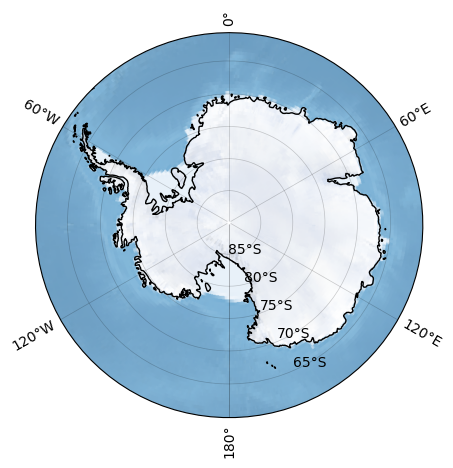

In [11]:
figure1 = plt.figure(figsize=(5, 5), facecolor="white")
ax1 = plt.subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

ax1.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

ax1.set_boundary(circle, transform=ax1.transAxes)

ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.2, linestyle="-")
ax1.stock_img()
ax1.coastlines()

## High resolution background topographic image

We have created a suite of different maps mostly relying on the satellite image using `stock_img`. However, if we look closly at those maps we an pick up quite easily that the displayed topography image is rather low resolution resulting in only a rough representation of the global topography. This becomes even more apparent when we zoom in to a spific region for example the Alps

C:\Users\maxim\.conda\envs\demo_cartopy\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


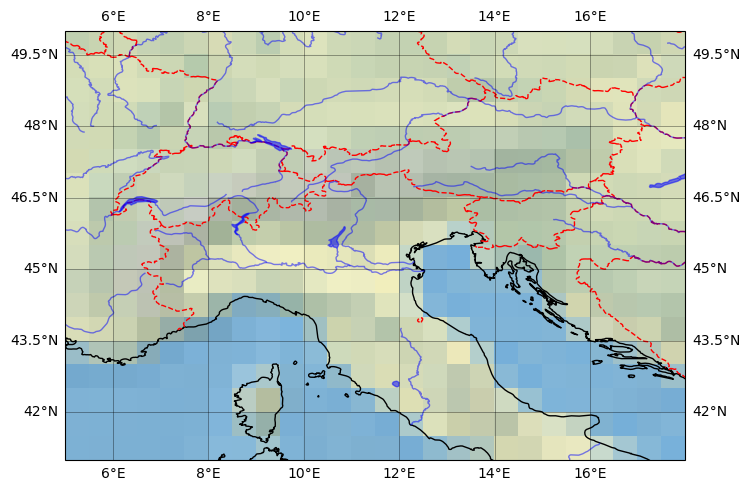

In [12]:
figure1 = plt.figure(figsize=(8, 8))
ax1 = figure1.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax1.set_extent([5, 18, 41, 50])
ax1.stock_img()
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS, linestyle="--", color="red")
ax1.add_feature(cfeature.LAKES, color="blue", alpha=0.5)
ax1.add_feature(cfeature.RIVERS, color="blue", alpha=0.5)
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")

## Data gridding

Additioanlly, `stock_img` provides only 2D representation of the topography  without real data which you might want to use in your data analysis. Therefore, we now want to find high resolution topography data and subsistute it for our Alpine map to A) create a map with a higher resolution and B) provides the actual data, which can be used in your data analysis. A good source of high resolution data is the ETOPO Global Relief Model (https://www.ncei.noaa.gov/products/etopo-global-relief-model). 

To plot the topography map we first will delve into the concept of gridding of point data (in this case the topographic data). First we want to download the specfic Etopo data set called **ETOPO_2022_v1_30s_N90W180_bed.nc** under the following link https://www.ngdc.noaa.gov/thredds/catalog/global/ETOPO2022/30s/30s_bed_elev_netcdf/catalog.html?dataset=globalDatasetScan/ETOPO2022/30s/30s_bed_elev_netcdf/ETOPO_2022_v1_30s_N90W180_bed.nc and place the netCDF file in the same directory as this jupyter notebook.

Next we need to load a libary that can open netCDF data. There are a varity of option such as `xarray`. However, we use here `netCDF4`:

In [13]:
import netCDF4 as nc4

Then we load the ETOPO dataset and put it into an variable called `etopo_nc` by running the following cell

In [14]:
etopo_nc = nc4.Dataset("ETOPO_2022_v1_30s_N90W180_bed.nc")

Runing the name the newly create variable contraining the netCDF dataset on it own will print out relevent menta data of the dataset including the dimensions of the data and the provide variables. Here lat lon and z, which is the height of the topography 

In [15]:
etopo_nc

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    GDAL_AREA_OR_POINT: Area
    node_offset: 1
    GDAL_TIFFTAG_COPYRIGHT: DOC/NOAA/NESDIS/NCEI > National Centers for Environmental Information, NESDIS, NOAA, U.S. Department of Commerce
    GDAL_TIFFTAG_DATETIME: 20220929123913.0
    GDAL_TIFFTAG_IMAGEDESCRIPTION: Topography-Bathymetry; EGM2008 height
    Conventions: CF-1.5
    GDAL: GDAL 3.3.2, released 2021/09/01
    NCO: netCDF Operators version 4.9.1 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)
    dimensions(sizes): lon(43200), lat(21600)
    variables(dimensions): |S1 crs(), float64 lat(lat), float64 lon(lon), float32 z(lat, lon)
    groups: 

For the aim of ploting a Alpine map with a high topography resolution it is inefficent to plot whole gobal dataset and subsequently zoom into the Alpine region. Espically because the 
 dataset is rather large and plotting the whole dataset is computational demanding. Therefore, we want to cut out the relevant region from the etopo dataset. There are different ways of achieving this. This might not be the most efficent way of doing it but the concept is rather straightforward. 
1) we grid the provided latitude and longitude chanel with `np.meshgrid` to obtaining 2D grids of each cordinate point. We need to do this because the topography is provided as a 2D grid in the netCDF file. So basically we want to create each coordinate point cooresponding to the topography grid
2) We use the `flatten()` function to reduce a multidemensional array (here our 2D grids) into one colume. We do this for each of the three grids.
3) Next we stack the three flatten colums togeother, which creates one variable containing three rows of x coordinate y coordinate and topographyic value
4) Last, the three colume variable is masked against the longitude and latitude ranges of the Alps (our map extent)

1) We use `np.meshgrid` to grid the coordinate vectors provided by the `ETOPO netCDF`.  indexing="xy" returns first the x grid (here `xq`) followed by the y grid (here `yq`)

In [16]:
xq, yq = np.meshgrid(
    etopo_nc.variables["lon"][:], etopo_nc.variables["lat"][:], indexing="xy"
)

now we can flatten the x and y coordiantes and the topographyic data and stack them into a signle data file in a xyz format (can take a while)

In [17]:
xflat = xq.flatten()
yflat = yq.flatten()
zflat = etopo_nc.variables["z"][:].flatten()
ETOPO_xyz = np.vstack((xflat, yflat, zflat)).T

The dataset is rather large and takes a long time to plot. We therefore want to cut out the relevent data for the Alps and Italy. We creating and index variable called `alp_lon_lat_index`, which test the coordinates against a minium and maximium in the x and y coordinate. Subsequently, we create a new `ETOPO_alps` which only includes the Alpine subset of the data within the defined x and y boundary

In [18]:
alp_lon_lat_index = (
    (ETOPO_xyz[:, 0] > 5)
    & (ETOPO_xyz[:, 0] < 18)
    & (ETOPO_xyz[:, 1] > 41)
    & (ETOPO_xyz[:, 1] < 50)
)

Etopo_alps = ETOPO_xyz[alp_lon_lat_index, :]

Now we need to grid the coordinates of the reduced dataset. We repeat the same `np.meshgrid` syntax as bevor

In [19]:
xgrid, ygrid = np.meshgrid(
    np.unique(Etopo_alps[:, 0]), np.unique(Etopo_alps[:, 1]), indexing="xy"
)

The data gridding is performed using `griddata` from the `scipy.interpolate` module. 

The syntax is x y points (coordinates) followed by the data value.Those values are just the first three data entries in the reduced Etopo_alps data file. The next two argument gives the x and y grids followed by the interpolation methode. The idalised syntax therefore is `griddata((x data coordinate , y data coordinate ) , data value , (grid_x , grid_y) , method='linear')`.

You can choose for the interpolation method from `nearest` (nearest neighbour), `linear`, and `cubic`.

Disclaimer, we have gridded here an already regular distributed data set. However, the workflow shown here can be applied to interpolate and grid irregular spaced data points. You might want your gridded product to have a fine or coarse resolution then your input data has. To do so you can varry the created meshgrid. A way to understand what happend during the gridding is to view the frist 3 agruments as your observed data point and to view the last 2 arguemtns (grid_x , grid_y) as the coordinates upon you interpolate your observed values   

In [20]:
from scipy.interpolate import griddata

In [21]:
Alp_topo_grid = griddata(
    (Etopo_alps[:, 0], Etopo_alps[:, 1]),
    Etopo_alps[:, 2],
    (xgrid, ygrid),
    method="linear",
)

Displaying the gridded data is the only thing left to do. However, before we create a colormap with which we are ploting the topography grid. Here we use use the `cmcrameri` python package. This step is not really neccary since you could as well use a predifined colormap from `atplotlib`. Regardless, using the `cmcrameri` is a good practices for two reasons: a) those colormaps are colorblind frindly and undistrubed (https://doi.org/10.1038/s41467-020-19160-7) and most importantly, perhaps, really easy to use. 

We just need to immport the libary and create a colormap with one line of code: `Topo_alps_cmap = cm.bukavu` (Chose a colormap from https://www.fabiocrameri.ch/colourmaps/)

In [22]:
from cmcrameri import cm

Topo_alps_cmap = cm.bukavu

Now we plot the topograhpic grid using `plt.pcolormesh`. The requiered syntax is as follows: x coordinate grid, y coordinate grid, values grid (here topography). Optinal syntax used here: `cmap` passes the colormap. Here we set our perivous created colormap `Topo_alps_cmap`. `vmin` and `vmax` give the smallest and largest data value, which is represented by the colormap. Here we use symatical boundaries to ensure that the `0m` values is in the midpoint of the colormap / colorbar.

Text(0.5, 1.0, 'meter')

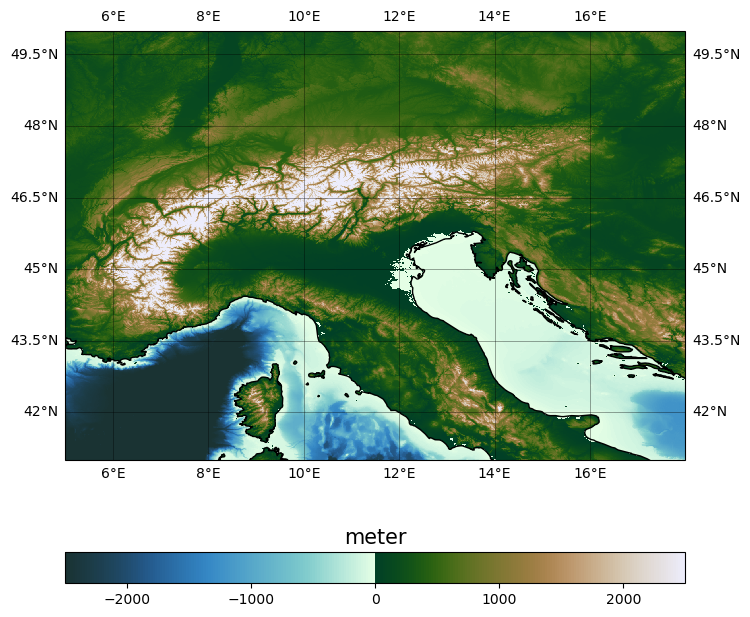

In [23]:
figure1 = plt.figure(figsize=(8, 8))
ax1 = figure1.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
im1 = plt.pcolormesh(
    xgrid, ygrid, Alp_topo_grid, cmap=Topo_alps_cmap, vmin=-2500, vmax=2500
)
ax1.coastlines()
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")
cb = plt.colorbar(im1, orientation="horizontal", shrink=1)
cb.ax.set_title("meter", fontsize=15)

Comparing this map output to the satellite images provides from cartopy it is apprant that we have a much higher resolution, which does justifies the additioanl effort in coding. Moreover, we also have controll of the topography data to do analysis or plot profiles etc.

## Adding overview map and data location

The map above is allready visaully appealing. However maybe we want to add a global overview map in the upper right corner of our map showing a polygon of the Alps to show the study area in a global context. To do so we create a figure with mulitple axis which basicall is a figure inside a figure.
But first we need to load to additional libraries `Polygon` from `shapely` and `geopandas` to create a polygon of the Alpine region. 

In [24]:
from shapely.geometry.polygon import Polygon
import geopandas as gpd

Now we define the extend (coordinates) of the Alpine overive polygon. We give x and y coordinates pairs for each polygon corner. We need to repeat the first coordinate pair entry to close the polygon. Then we pass those x and y coordinates to the `polygon`

In [25]:
# define polygon extend (repeat first point to close the polygon)
x_ps_point_list = [5, 5, 18, 18, 5]
y_ps_point_list = [41, 50, 50, 41, 41]

# create the polygon and also create a GeoSeries, which holds the polygon for plotting with geopandas
polygon_geom = Polygon(zip(x_ps_point_list, y_ps_point_list))
polygon_alps = gpd.GeoSeries(polygon_geom)

Bevore we can plot the overview map we need to create a second `axis`, here `ax2`. The syntax for this is: `plt.axes([Origin x, Origin y, width, height]`. This coordinate system ranges from 0 at the bottom left of the figure to 1 at the top right of the figure. Width and height is a ratio of the maxium demension of the Figure. 
Here we want to plot the overview map in the top right corner. Therefore, we set the x origin to 60% (0.6) and y origin 53% (0.53) with a width of 29.5 (0.295) and height of 25% (0.25)

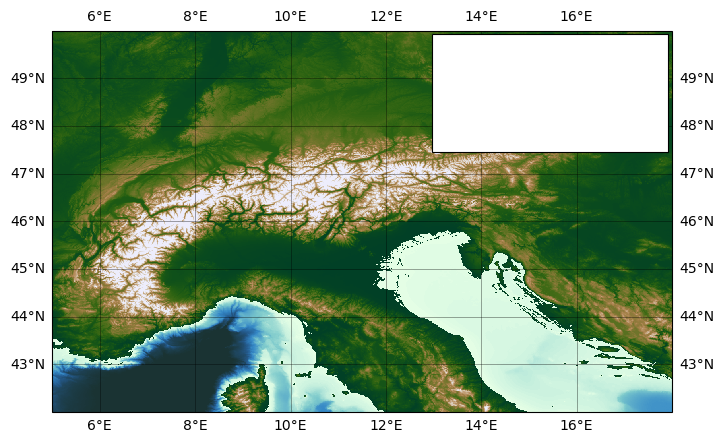

In [26]:
figure1 = plt.figure(figsize=(8, 8))
ax1 = figure1.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax1.set_extent([5, 18, 42, 50])
im1 = plt.pcolormesh(
    xgrid, ygrid, Alp_topo_grid, cmap=Topo_alps_cmap, vmin=-2500, vmax=2500
)

ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")


# insert an additional axes for the overview map
ax2 = plt.axes([0.6, 0.53, 0.295, 0.25], projection=ccrs.PlateCarree())

For the overview map we use once again the satellite image from `cartopy` by using `stock_img()`. On top of the satellite image we plot the Alpine polygon in red. We add `cfeature` from before as well for the final map.

C:\Users\maxim\.conda\envs\demo_cartopy\lib\site-packages\cartopy\mpl\feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


<GeoAxes: >

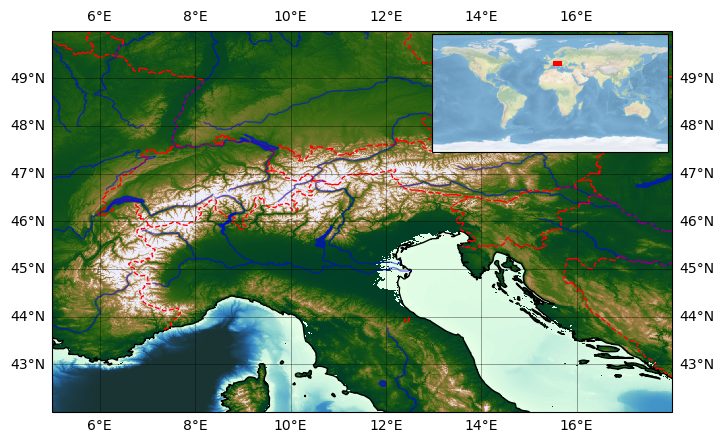

In [27]:
figure1 = plt.figure(figsize=(8, 8))
ax1 = figure1.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax1.set_extent([5, 18, 42, 50])
im1 = plt.pcolormesh(
    xgrid, ygrid, Alp_topo_grid, cmap=Topo_alps_cmap, vmin=-2500, vmax=2500
)
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS, linestyle="--", color="red")
ax1.add_feature(cfeature.LAKES, color="blue", alpha=0.5)
ax1.add_feature(cfeature.RIVERS, color="blue", alpha=0.5)
ax1.gridlines(linewidth=0.5, draw_labels=True, color="k", alpha=0.5, linestyle="-")


# insert an additional axes for the overview map
ax2 = plt.axes([0.6, 0.53, 0.295, 0.25], projection=ccrs.PlateCarree())

ax2.stock_img()
polygon_alps.plot(ax=ax2, color="red", transform=ccrs.PlateCarree())